In [86]:
path_REM =  '../../Data/REM/WP4/'
path_PTA =  '../../Data/data/'


In [87]:
#import necessary packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pandas import ExcelFile

In [88]:
#BEAR gain targets 
def calculateBEARtarget(audiogram, profile):
    betas = dict()
    betas['A'] = np.array([[0, 0, 1, 5, 5, 3, 3],
                           [0, 0, -2, 0, 0, 0, 0],
                           [0, 0, -5, -5, -5, -5, -5]])
    betas['B'] = np.array([[-3, -3, 1, 5, 5, 7, 7],
                           [-3, -3, -2, 0, 0, 0, 0],
                           [-6, -6, -9, -9, -9, -9, -9]])
    betas['C'] = np.array([[-2, -1.3, 1, 4, 7, 7, 7],
                           [-10, -10, -5, 0, 0, 0, 0],
                           [-14, -14, -14, -14, -14, -14, -14]])
    betas['D'] = np.array([[0, 0, 0, 3, 2, 2, 2],
                           [-6, -6, -6, -3, -3, -3, -3],
                           [-10, -10, -10, -10, -14, -14, -14]])
    target = 0.31*np.array([audiogram, audiogram, audiogram]) + betas[profile]
    
    target[target < 0] = 0

    return target

In [89]:

#load all the GN REM data files from sharepoint
import os
#text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
text_files = [f for f in os.listdir(path_REM) if f.endswith('first fit.txt')]

REM = {}
REM_ = []
cnt = 0
for f in text_files:
    print(path+f)
    REM[cnt] = pd.read_csv(path_REM + f,sep=';', skipinitialspace=True, index_col=False)
    print(REM[cnt])
    #REM[cnt].drop('RC_ID', axis=1, inplace = True)
    REM_.append(pd.DataFrame(REM[cnt]))
    cnt += 1
df_REM = pd.concat(REM_)



#smoothing 
np.savetxt(path + 'REM_data_WP4.txt', df_REM.loc[:,'86':'9976'], fmt='%f')
#now load the smoothed data again (you need to run Smoothing_REM_input.m in Matlab in order to create the file)
df_REM.reset_index(inplace=True)
REM_smooth = pd.concat((df_REM.iloc[:,0:4], pd.read_csv(path_REM + 'Smoothed_REM_WP4.csv', names= df_REM.loc[:,'86':'9976'].columns)),axis=1).iloc[:,1:]



 70   Left  3.159008  1.460638  0.684149   
3   364-96_GN_REM_fitting   REOG 70  Right  2.350135  1.915535  0.921802   
4   364-96_GN_REM_fitting   REIG 65   Left  0.749355  0.134896  0.275759   
5   364-96_GN_REM_fitting   REIG 65  Right -0.284881 -0.004625  0.168263   
6   364-96_GN_REM_fitting   REIG 65   Left  1.245489  0.137534  0.247634   
7   364-96_GN_REM_fitting   REIG 65  Right  0.376646  0.023692  0.179613   
8   364-96_GN_REM_fitting   REIG 65   Left  1.274750  0.266153  0.492753   
9   364-96_GN_REM_fitting   REIG 65  Right  0.764173  0.101743  0.292857   
10  364-96_GN_REM_fitting   REIG 65   Left  1.349816  0.161229  0.238769   
11  364-96_GN_REM_fitting   REIG 65  Right  0.492817 -0.033741  0.101030   
12  364-96_GN_REM_fitting   REIG 65   Left  1.271525  0.197294  0.386317   
13  364-96_GN_REM_fitting   REIG 65  Right  0.516720  0.080046  0.260892   
14  364-96_GN_REM_fitting   REIG 65   Left  1.216499  0.166502  0.332063   
15  364-96_GN_REM_fitting   REIG 65  Right  

# Plot insertion gain + targets for OUH data

364-42
364-44
364-56
364-62
364-78
364-82
364-84
364-86
364-96
364-102
364-104
364-112
364-120


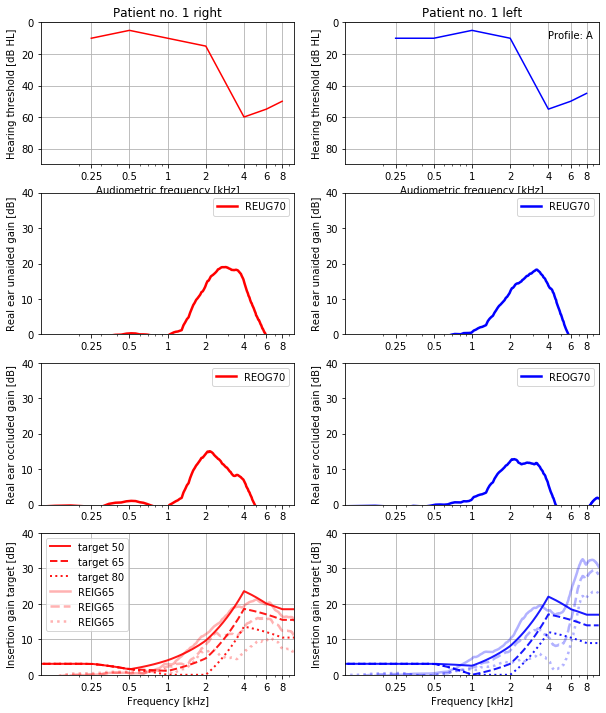

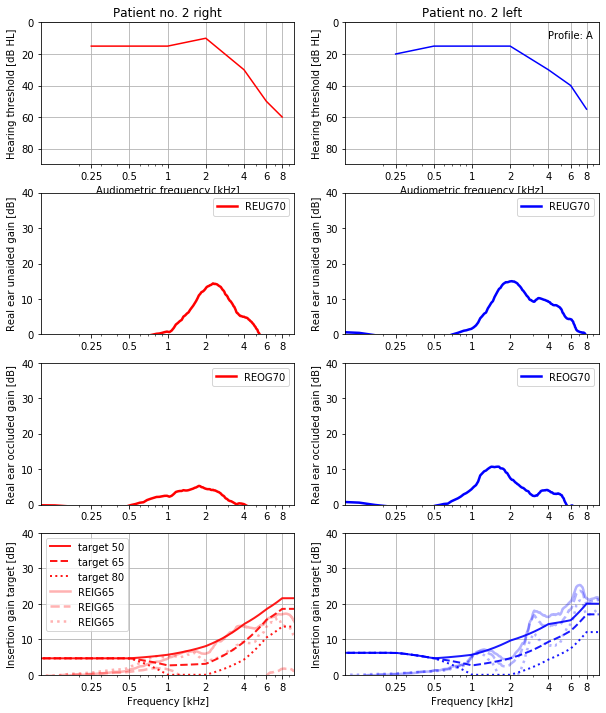

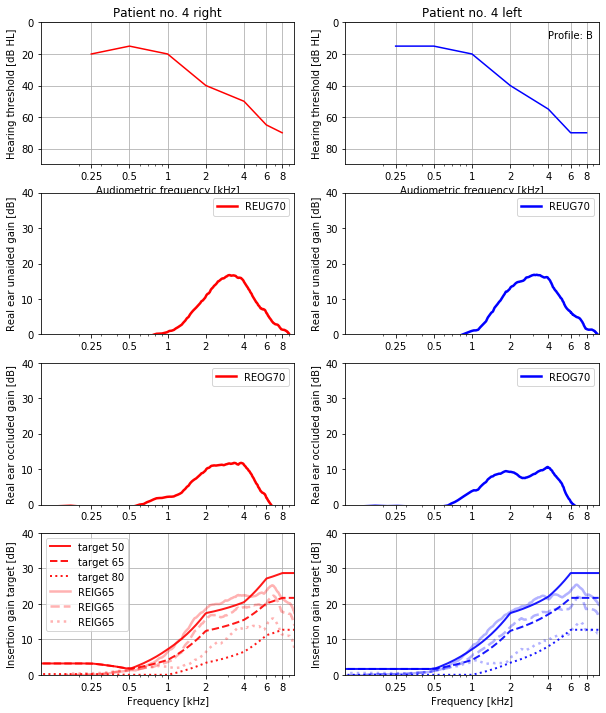

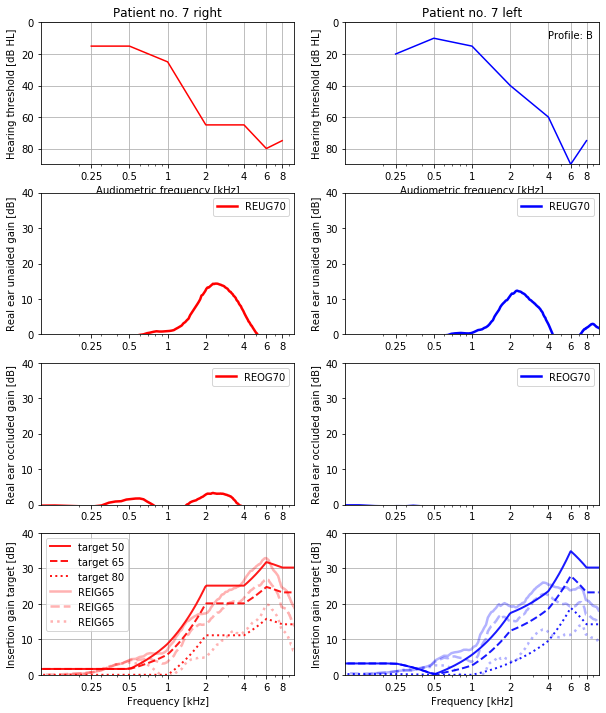

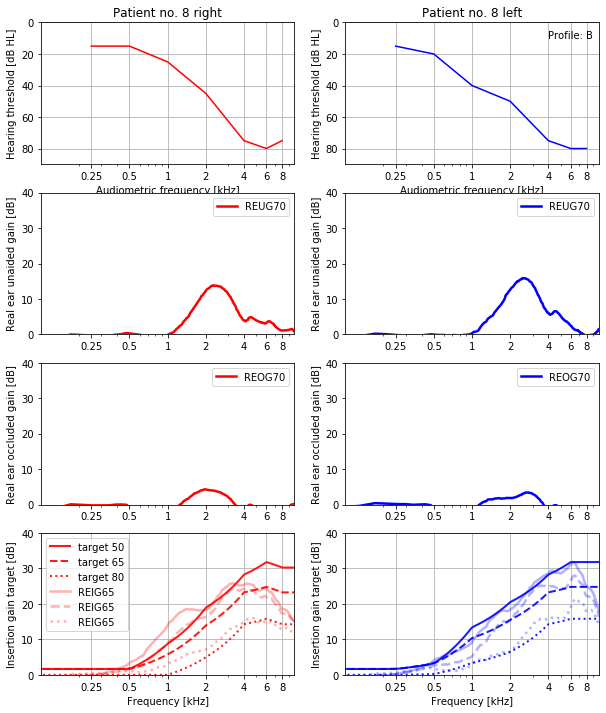

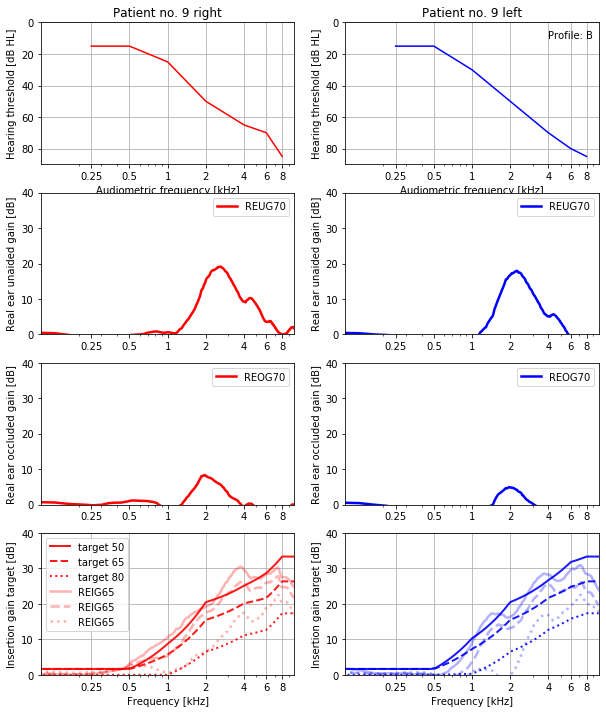

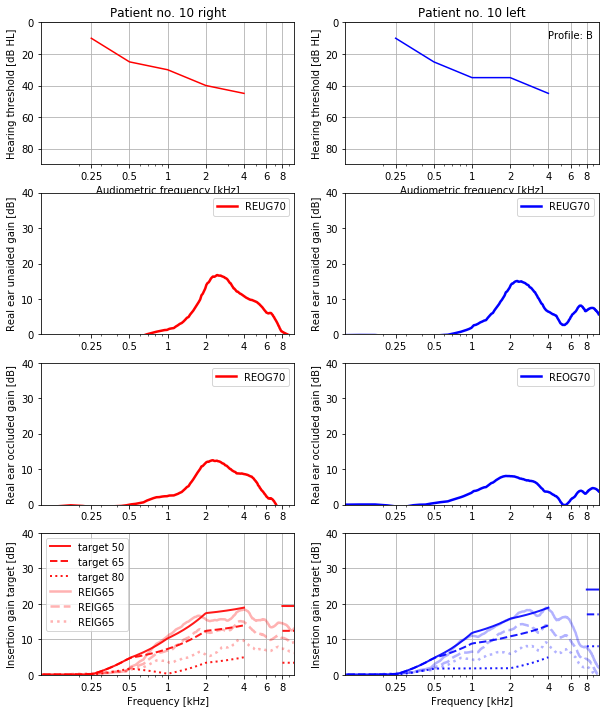

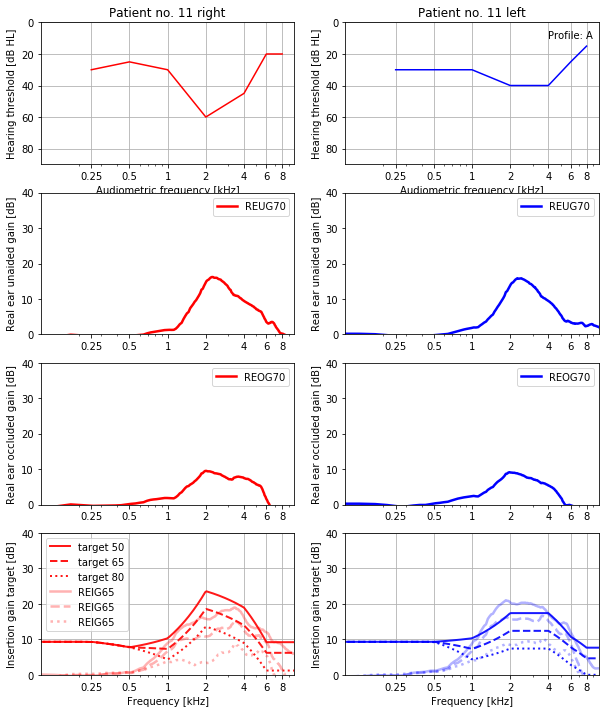

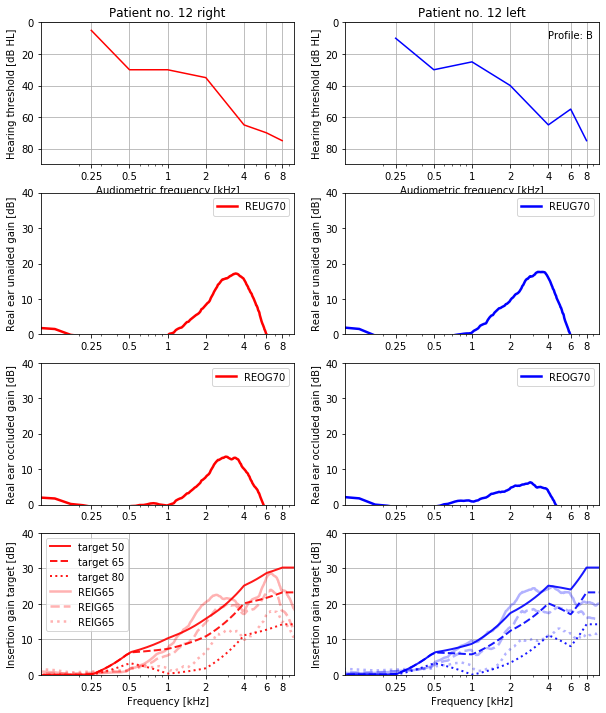

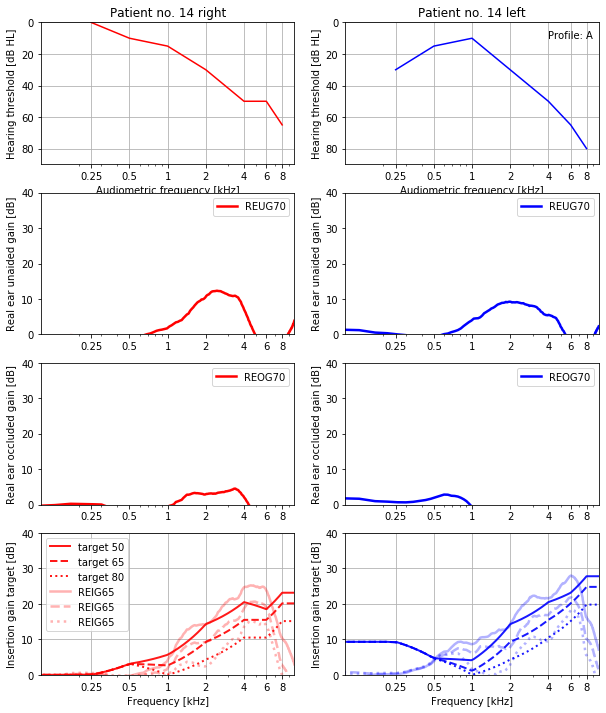

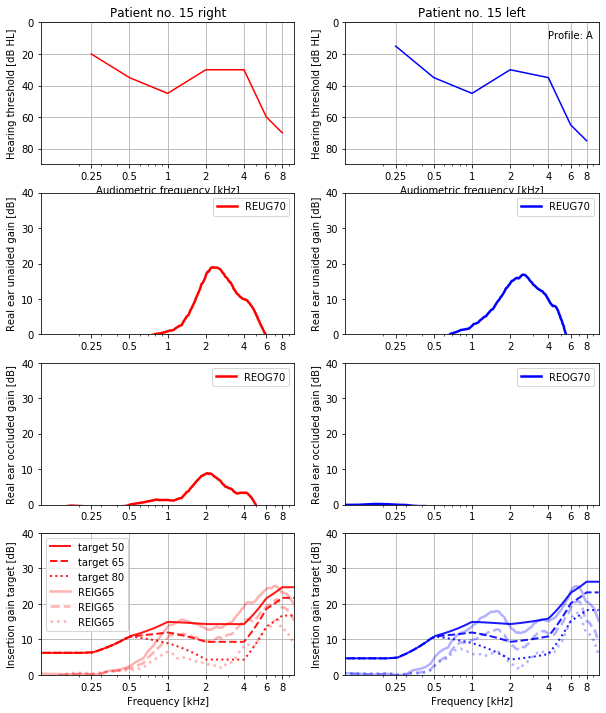

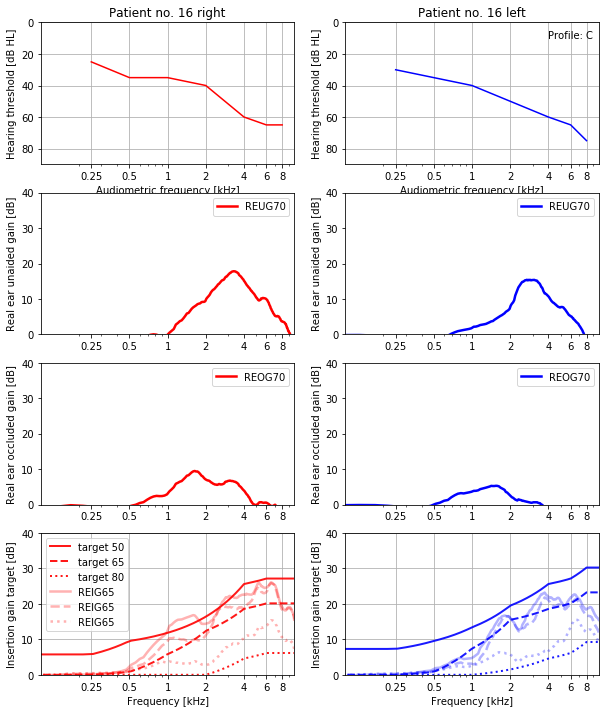

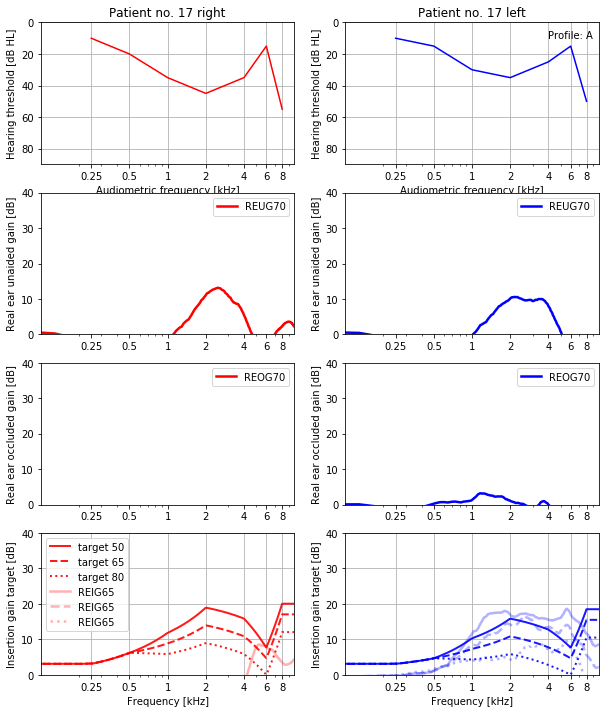

In [90]:
#now plot the REM plus target gains together for the OUH data 
df = pd.read_excel(path_PTA+'WP4_Pilots_Data_OUH_GN.xlsx')

nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)



    #now get the corresponding REM     
    df_ = REM_smooth[REM_smooth['RC_ID'].str.contains(df.iloc[patient_idx,0][4:])] #this is different from the other data files!!!!!

    if(df_.empty):
        continue

    freqs_s = list(df_.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]
    
    # Find all REIGs, REUG, REOG for a given patient
    REIG_65_right_idx = np.max(np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Right').values ))
    REIG_65_left_idx  = np.max(np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Left').values ))

    REIG_55_right_idx = np.max(np.where( (df_[['Test']] == 'REIG 55').values * (df_[['Ear']] == 'Right').values ))
    REIG_55_left_idx  = np.max(np.where( (df_[['Test']] == 'REIG 55').values * (df_[['Ear']] == 'Left').values ))

    REIG_80_right_idx = np.max(np.where( (df_[['Test']] == 'REIG 80').values * (df_[['Ear']] == 'Right').values ))
    REIG_80_left_idx  = np.max(np.where( (df_[['Test']] == 'REIG 80').values * (df_[['Ear']] == 'Left').values ))

    REUG_right_idx = np.max(np.where( (df_[['Test']] == 'REUG 70').values * (df_[['Ear']] == 'Right').values ))
    REUG_left_idx = np.max(np.where( (df_[['Test']] == 'REUG 70').values * (df_[['Ear']] == 'Left').values ))

    REOG_right_idx = np.max(np.where( (df_[['Test']] == 'REOG 70').values * (df_[['Ear']] == 'Right').values ))
    REOG_left_idx = np.max(np.where( (df_[['Test']] == 'REOG 70').values * (df_[['Ear']] == 'Left').values ))
        

    #interpolate the frequencies and values of the audiogram 
    target_left_ = []
    target_right_ = []
    for idx in range(3):
        target_left_.append(np.interp(freqs, freqs_audio_no3k, target_left[idx,:].astype('float64')))
        target_right_.append(np.interp(freqs, freqs_audio_no3k, target_right[idx,:].astype('float64')))

    target_left__ = np.array(target_left_)
    target_right__ = np.array(target_right_)
    

    plt.figure(figsize=(10,12))
    plt.subplot(4,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
   
    plt.subplot(4,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    plt.subplot(4,2,3)
    plt.semilogx(freqs,df_.iloc[REUG_right_idx,3:],'r',linewidth=2.5,linestyle='solid',label='REUG70')
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.ylabel('Real ear unaided gain [dB]')
    plt.legend()

    plt.subplot(4,2,4)
    plt.semilogx(freqs,df_.iloc[REUG_left_idx,3:],'b',linewidth=2.5,linestyle='solid',label='REUG70')
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.ylabel('Real ear unaided gain [dB]')
    plt.legend()

    plt.subplot(4,2,5)
    plt.semilogx(freqs,df_.iloc[REOG_right_idx,3:],'r',linewidth=2.5,linestyle='solid',label='REOG70')
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.ylabel('Real ear occluded gain [dB]')
    plt.legend()


    plt.subplot(4,2,6)
    plt.semilogx(freqs,df_.iloc[REOG_left_idx,3:],'b',linewidth=2.5,linestyle='solid',label='REOG70')
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.ylabel('Real ear occluded gain [dB]')
    plt.legend()

    
    plt.subplot(4,2,7)
    plt.semilogx(freqs,target_right__[0,:],'r',linewidth = 2,alpha = 0.9, linestyle = 'solid',label='target 50')
    plt.semilogx(freqs,target_right__[1,:],'r',linewidth = 2,alpha = 0.9, linestyle = 'dashed',label='target 65')
    plt.semilogx(freqs,target_right__[2,:],'r',linewidth = 2,alpha = 0.9, linestyle = 'dotted',label='target 80')
    #REM 1 REIG55dB
    plt.semilogx(freqs,df_.iloc[REIG_55_right_idx,3:],'r',linewidth=2.5,alpha=0.3,linestyle='solid',label='REIG65')
    plt.grid()
    #REM 2 REIG65dB
    plt.semilogx(freqs,df_.iloc[REIG_65_right_idx,3:],'r',linewidth=2.5,alpha=0.3,linestyle='dashed',label='REIG65')
    plt.grid()
    #REM 3 REIG80dB
    plt.semilogx(freqs,df_.iloc[REIG_80_right_idx,3:],'r',linewidth=2.5,alpha=0.3,linestyle='dotted',label='REIG65')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    plt.legend()
    
    plt.subplot(4,2,8)
    plt.semilogx(freqs,target_left__[0,:],'b',linewidth = 2,alpha = 0.9, linestyle = 'solid')
    plt.semilogx(freqs,target_left__[1,:],'b',linewidth = 2,alpha = 0.9, linestyle = 'dashed')
    plt.semilogx(freqs,target_left__[2,:],'b',linewidth = 2,alpha = 0.9, linestyle = 'dotted')
    #REM @ REIG55dB
    plt.semilogx(freqs,df_.iloc[REIG_55_left_idx,3:],'b',linewidth=2.5,alpha=0.3,linestyle='solid')
    plt.grid()
    #REM @ REIG65dB
    plt.semilogx(freqs,df_.iloc[REIG_65_left_idx,3:],'b',linewidth=2.5,alpha=0.3,linestyle='dashed')
    plt.grid()
    #REM @ REIG65dB
    plt.semilogx(freqs,df_.iloc[REIG_80_left_idx,3:],'b',linewidth=2.5,alpha=0.3,linestyle='dotted')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')

    #get broader edges
    plt.subplots_adjust(wspace=0.2, hspace=0.25)
    
    print(df.iloc[patient_idx,0][4:])
    
   
        
    
    

In [91]:
REM_smooth['Test'].values


array([&#39;REUG 70&#39;, &#39;REUG 70&#39;, &#39;REOG 70&#39;, &#39;REOG 70&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;,
       &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;,
       &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;,
       &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 55&#39;, &#39;REIG 55&#39;,
       &#39;REIG 55&#39;, &#39;REIG 55&#39;, &#39;REIG 80&#39;, &#39;REIG 80&#39;, &#39;REIG 80&#39;, &#39;REIG 80&#39;,
       &#39;REIG 80&#39;, &#39;REIG 80&#39;, &#39;LTASS 65&#39;, &#39;LTASS 65&#39;, &#39;REUG 70&#39;, &#39;REUG 70&#39;,
       &#39;REOG 70&#39;, &#39;REOG 70&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;,
       &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;, &#39;REIG 65&#39;,
       &#39;REIG 65&#39;, &#39

&lt;matplotlib.axes._subplots.AxesSubplot at 0x19c33449c48&gt;